In [0]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
%matplotlib inline

In [0]:
#Read the data
data = pd.read_csv("SMS-Messages2.csv", encoding='utf-8')
data.head(n=10)

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham
5,'FreeMsg Hey there darling it\'s been 3 week\'...,spam
6,'Even my brother is not like to speak with me....,ham
7,'As per your request \'Melle Melle (Oru Minnam...,ham
8,'WINNER!! As a valued network customer you hav...,spam
9,'Had your mobile 11 months or more? U R entitl...,spam


In [0]:
data.columns

Index(['Message', 'Class_Label'], dtype='object')

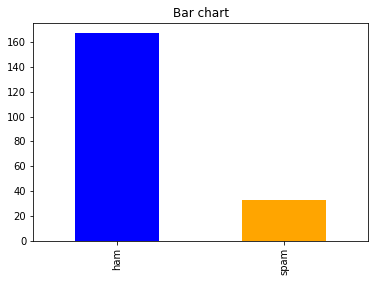

In [0]:
#Explore the data
count_Class=pd.value_counts(data["Class_Label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [0]:
data['length'] = data['Message'].apply(len)
data.head()

,Message,Class_Label,length
0,'Go until jurong point,ham,22
1,'Ok lar... Joking wif u oni...',ham,31
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,159
3,'U dun say so early hor... U c already then sa...,ham,51
4,'Nah I don\'t think he goes to usf,ham,34


In [0]:
#Create Bag of Words (BoW) using CountVectoriser
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["Message"])
np.shape(X)

(200, 841)

In [0]:
#Transform the class_label to 1-0 (recode)
y=data["Class_Label"].map({'spam':1,'ham':0})

#Create train and test samples
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(134, 841), (66, 841)]


In [0]:
#Build a naive Bayesian model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
accuracy_score(y_test,prediction)

0.8636363636363636

In [0]:
print(prediction)

[1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0]


In [0]:
test_df = pd.DataFrame(y_test)

In [0]:
test_df['predictions'] = prediction

In [0]:
test_df.head()

,Class_Label,predictions
95,1,1
15,1,1
30,0,0
158,0,0
128,0,0


In [0]:
#Confusionn matrix for Naive Bayes
pd.crosstab(test_df.Class_Label, test_df.predictions)

predictions,0,1
Class_Label,,
0,43,7
1,2,14


In [0]:
#Build SVM model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
accuracy_score(y_test,prediction)

0.9090909090909091

In [0]:
print(prediction)

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]


In [0]:
test_df = pd.DataFrame(y_test)

In [0]:
test_df['predictions'] = prediction

In [0]:
test_df.head()

,Class_Label,predictions
95,1,1
15,1,0
30,0,0
158,0,0
128,0,0


In [0]:
#Confusionn matrix for SVM
pd.crosstab(test_df.Class_Label, test_df.predictions)

predictions,0,1
Class_Label,,
0,50,0
1,6,10


In [0]:
#Build Random Forest model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
prediction = rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,prediction)

0.7575757575757576

In [0]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
test_df = pd.DataFrame(y_test)

In [0]:
test_df['predictions'] = prediction

In [0]:
test_df.head()

,Class_Label,predictions
95,1,0
15,1,0
30,0,0
158,0,0
128,0,0


In [0]:
#Confusionn matrix for RF
pd.crosstab(test_df.Class_Label, test_df.predictions)

predictions,0
Class_Label,
0,50
1,16


In [0]:
!jupyter nbconvert MODULE4_DAY3_ModelBasedClassification.ipynb

[NbConvertApp] Converting notebook MODULE4_DAY3_ModelBasedClassification.ipynb to html
[NbConvertApp] Writing 311183 bytes to MODULE4_DAY3_ModelBasedClassification.html
